#Multiclass Classification

When you have more than two classes as an option, it is called **multi-class classification**. 

For this multi-class classification problem, we are going to build a neural network to classify different images of clothing.

In [33]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into train and test sets
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

In [34]:
# Show the first training example
print(f"First training data:\n{train_data[0]}\n")
print(f"First training label:\n{train_label[0]}")

First training data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1  

In [35]:
# Check the shapes of our training sample
train_data[0].shape, train_label[0].shape

((28, 28), ())

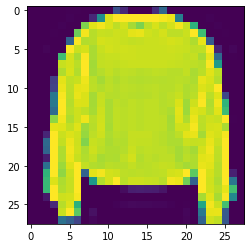

In [36]:
#Show a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [37]:
# Create a small list to index onto training labels so they are human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

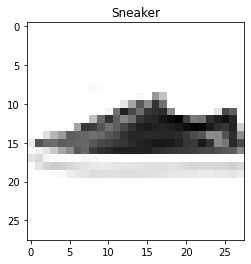

In [38]:
# Plot an example image and its label
index_of_choice = 131
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_label[index_of_choice]]);

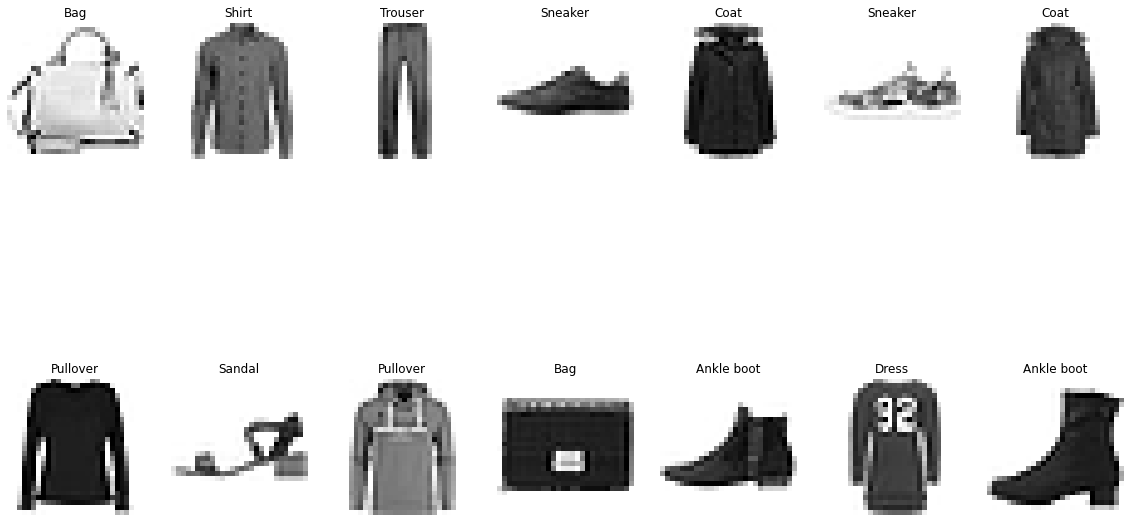

In [39]:
# Plot multiple random images of fashion MNIST
import random

plt.figure(figsize=(20, 12))
for i in range(14):
  ax = plt.subplot(2, 7, i+1)
  index_val = random.choice(range(len(train_data)))
  plt.imshow(train_data[index_val], cmap=plt.cm.binary)
  plt.title(class_names[train_label[index_val]])
  plt.axis(False)

## Building a multi-class classification model

* Input shape -  28 x 28
* Output shape = 10
* Loss function:
  * If the labels are one hot encoded, we can use the `CategoricalCrossentropy()`
  * If the labels are in integer form, we need to use the `SparseCategoricalCrossentropy()` 
* Output layer activation - `Softmax`


In [40]:
# Set random seed
tf.random.set_seed = 42

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model.fit(train_data, tf.one_hot(train_label, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_label, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4100 - accuracy: 0.1029 - val_loss: 2.2779 - val_accuracy: 0.1144
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2115 - accuracy: 0.1431 - val_loss: 2.0544 - val_accuracy: 0.2036
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7671 - accuracy: 0.2912 - val_loss: 1.6049 - val_accuracy: 0.3291
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5798 - accuracy: 0.3343 - val_loss: 1.5635 - val_accuracy: 0.3398
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5419 - accuracy: 0.3430 - val_loss: 1.5312 - val_accuracy: 0.3483
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5195 - accuracy: 0.3516 - val_loss: 1.5113 - val_accuracy: 0.3490
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5140 - accuracy: 0.3535 - val_loss: 1.5184 - val_accuracy:

In [41]:
# Check the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Check the min and max value of the train data
train_data.min(), train_data.max()

(0, 255)

Neural network prefers data to be scaled (or nomalized), this means they like to have values between 1 and 0. 

In [43]:
# We can get our train and test data values between 0 and 1 by dividing them by the max value
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [44]:
# Now that our data is normalized, we will build another model to find patterns in it.
# Set random seed
tf.random.seed = 42

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
norm_history = model_2.fit(train_data_norm, tf.one_hot(train_label, depth=10), epochs=10,
                           validation_data=(test_data_norm, tf.one_hot(test_label, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2346 - accuracy: 0.5108 - val_loss: 0.8784 - val_accuracy: 0.6579
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7902 - accuracy: 0.7006 - val_loss: 0.7740 - val_accuracy: 0.7349
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7040 - accuracy: 0.7574 - val_loss: 0.7115 - val_accuracy: 0.7541
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6593 - accuracy: 0.7697 - val_loss: 0.6743 - val_accuracy: 0.7660
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6373 - accuracy: 0.7752 - val_loss: 0.6669 - val_accuracy: 0.7685
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6189 - accuracy: 0.7854 - val_loss: 0.6331 - val_accuracy: 0.7898
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5975 - accuracy: 0.7961 - val_loss: 0.6173 - val_accuracy:

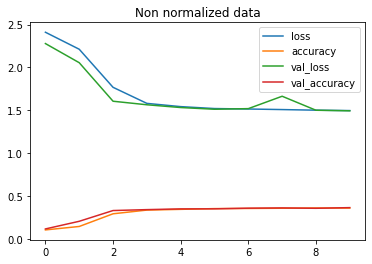

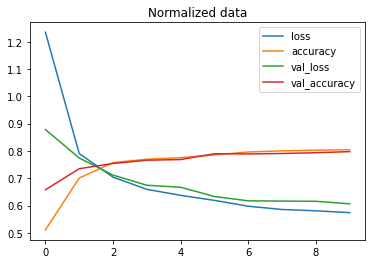

In [45]:
import pandas as pd
# Plot the non normalized loss curve
pd.DataFrame(non_norm_history.history).plot(title="Non normalized data")
# Plot the normalized loss curve
pd.DataFrame(norm_history.history).plot(title="Normalized data");

## Finding the idea learning rate

In [46]:
# Set the random seed
tf.random.set_seed = 42

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Set a learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

# Fit the model
history_3 = model_3.fit(train_data_norm, train_label, epochs=40, callbacks=[lr_scheduler], validation_data=(test_data_norm, test_label))

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2434 - accuracy: 0.5223 - val_loss: 0.9204 - val_accuracy: 0.6508
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8492 - accuracy: 0.6754 - val_loss: 0.8450 - val_accuracy: 0.6738
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7733 - accuracy: 0.7071 - val_loss: 0.7649 - val_accuracy: 0.7165
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7216 - accuracy: 0.7358 - val_loss: 0.7204 - val_accuracy: 0.7416
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6751 - accuracy: 0.7551 - val_loss: 0.6923 - val_accuracy: 0.7594
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6465 - accuracy: 0.7661 - val_loss: 0.6638 - val_accuracy: 0.7694
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6335 - accuracy: 0.7687 - val_loss: 0.6953 - val_accuracy:

Text(0.5, 1.0, 'Ideal Learning Rate')

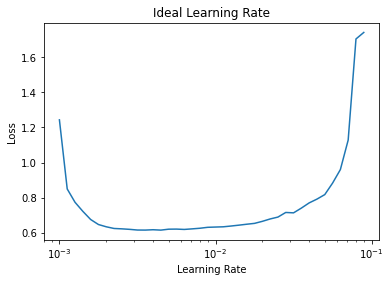

In [47]:
# Plot the learning rate decay curve
lrs = 1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs, history_3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Ideal Learning Rate")

In [48]:
# Let's refit a model with the ideal learning rate
# Set random seed 
tf.random.set_seed = 42

# Create a model
model_4 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(4, activation="relu"),
      tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data_norm, train_label, epochs=20, validation_data=(test_data_norm, test_label))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2169 - accuracy: 0.5556 - val_loss: 0.8433 - val_accuracy: 0.7006
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7527 - accuracy: 0.7305 - val_loss: 0.7169 - val_accuracy: 0.7504
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6748 - accuracy: 0.7562 - val_loss: 0.6692 - val_accuracy: 0.7585
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6344 - accuracy: 0.7714 - val_loss: 0.6357 - val_accuracy: 0.7745
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6036 - accuracy: 0.7835 - val_loss: 0.6225 - val_accuracy: 0.7821
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5836 - accuracy: 0.7918 - val_loss: 0.6201 - val_accuracy: 0.7856
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5685 - accuracy: 0.7993 - val_loss: 0.5910 - val_accuracy:

## Evaluating out multi-class classification model

In [49]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

figsize = (10, 10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

In [50]:
# Make some predicts with our model
y_probs = model_4.predict(test_data_norm) # Predicting prediction probabilities

y_probs[:5]

array([[4.8882468e-04, 1.4429985e-04, 1.0241910e-04, 1.6993914e-05,
        1.2099149e-06, 6.2050700e-02, 3.4417110e-04, 1.4220557e-01,
        3.2813565e-05, 7.9461300e-01],
       [1.1718890e-03, 1.9092899e-03, 5.6140381e-01, 3.4181033e-03,
        3.7955901e-01, 3.9510212e-25, 5.0771408e-02, 4.0166852e-18,
        1.7665674e-03, 8.6277345e-21],
       [3.9860523e-05, 9.9986935e-01, 8.5994307e-06, 8.1936189e-05,
        2.2922793e-08, 3.5317448e-34, 2.9330545e-07, 7.0361155e-23,
        6.9850825e-10, 1.9067036e-25],
       [6.8685898e-05, 9.9966955e-01, 6.4473529e-06, 2.5496993e-04,
        1.2432023e-08, 4.6383071e-29, 3.3592326e-07, 2.8634728e-20,
        5.8803407e-09, 2.2923197e-23],
       [1.5579122e-01, 2.2018240e-03, 5.1115226e-02, 2.3586694e-02,
        6.5345675e-02, 1.9107099e-12, 7.0152622e-01, 3.8570411e-11,
        4.3322917e-04, 1.9612645e-10]], dtype=float32)

In [51]:
# Convert all our prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View first ten predictions
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [52]:
# Make a simple confusion_matrix
confusion_matrix(y_true=test_label, y_pred=y_preds)

array([[779,   9,  16,  63,  11,   5, 103,   0,  14,   0],
       [  7, 945,  12,  27,   3,   0,   2,   0,   4,   0],
       [ 16,   4, 672,   8, 197,   0,  79,   0,  24,   0],
       [ 43,  25,  13, 806,  53,   3,  40,   0,  17,   0],
       [  0,   4, 105,  25, 744,   0, 114,   0,   8,   0],
       [  1,   0,   0,   0,   0, 867,   1,  65,  10,  56],
       [149,  10, 103,  29, 153,   4, 517,   1,  34,   0],
       [  0,   0,   0,   0,   0,  37,   0, 943,   1,  19],
       [  0,   2,  31,   8,   5,   7,  17,   7, 922,   1],
       [  0,   0,   0,   0,   0,  18,   0,  74,   0, 908]])

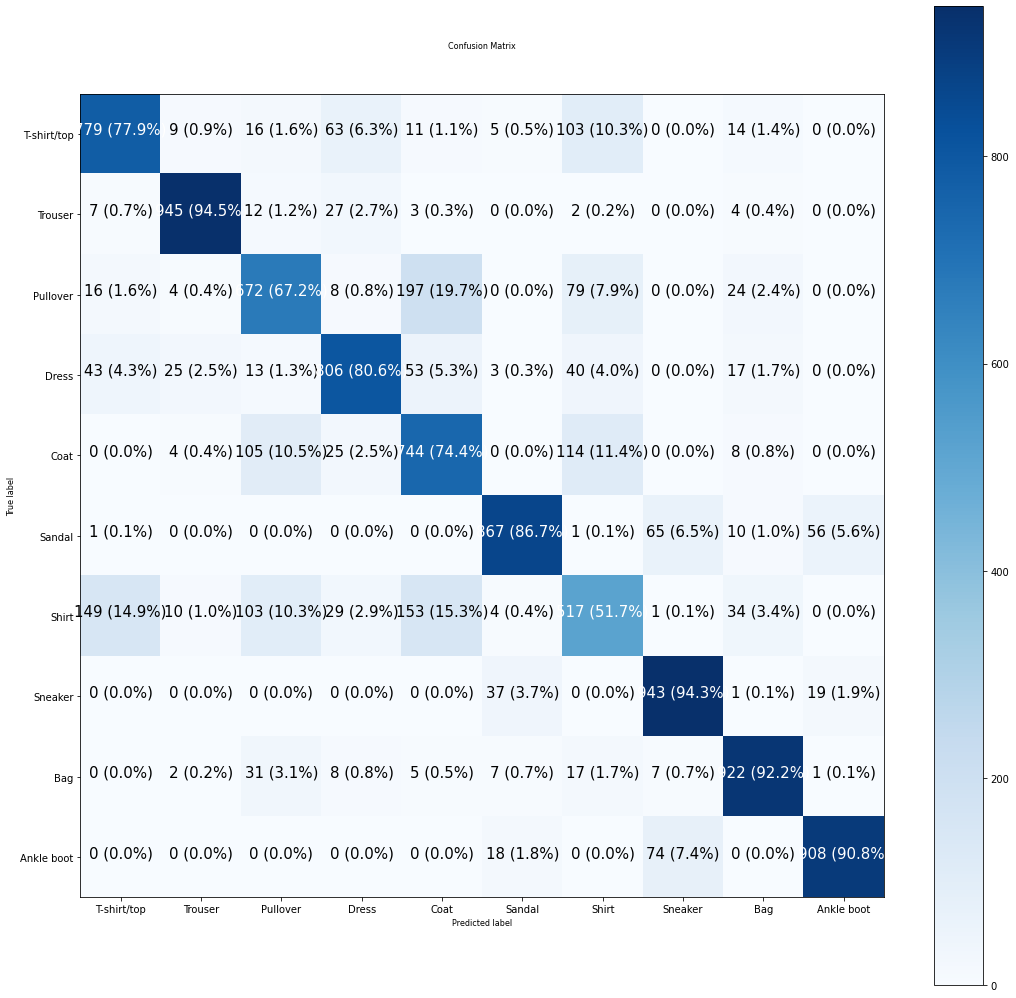

In [53]:
# Make a more visual confusion matrix
make_confusion_matrix(y_true=test_label, y_pred=y_preds, classes=class_names, figsize=(18,18), text_size=8)

Let's make a function to:
* Plot an image
* Make prediction on the image
* Label the plot with truth label and predicted label


In [54]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it with truth and predicted label
  """
  # Set a random integer
  i = random.randint(0, len(images))

  # Predict on the model
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28) )
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the text according to right or wrong prediction
  if pred_label == true_label:
    color="green"
  else:
    color="red"

  # Add xlabel information
  plt.xlabel(f"Predicted: {pred_label}, Actual: {true_label}", color=color)

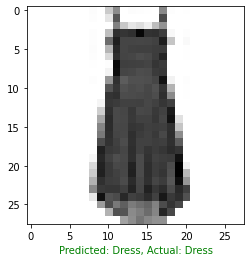

In [55]:
# Check a random image and prediction
plot_random_image(model=model_4, images=test_data_norm, true_labels=test_label, classes=class_names)

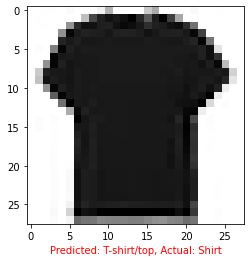

In [56]:
# Check again a random image and prediction
plot_random_image(model=model_4, images=test_data_norm, true_labels=test_label, classes=class_names)

In [60]:
# Create a function to view multiple random predictions
def plot_multiple_random_preds(model, images, true_labels, classes):
  
  plt.figure(figsize=(15,15))
  for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    # Set a random integer
    i = random.randint(0, len(images))

    # Predict on the model
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28) )
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the text according to right or wrong prediction
    if pred_label == true_label:
      color="green"
    else:
      color="red"

    # Add xlabel information
    plt.xlabel(f"Predicted: {pred_label}, Actual: {true_label}", color=color)

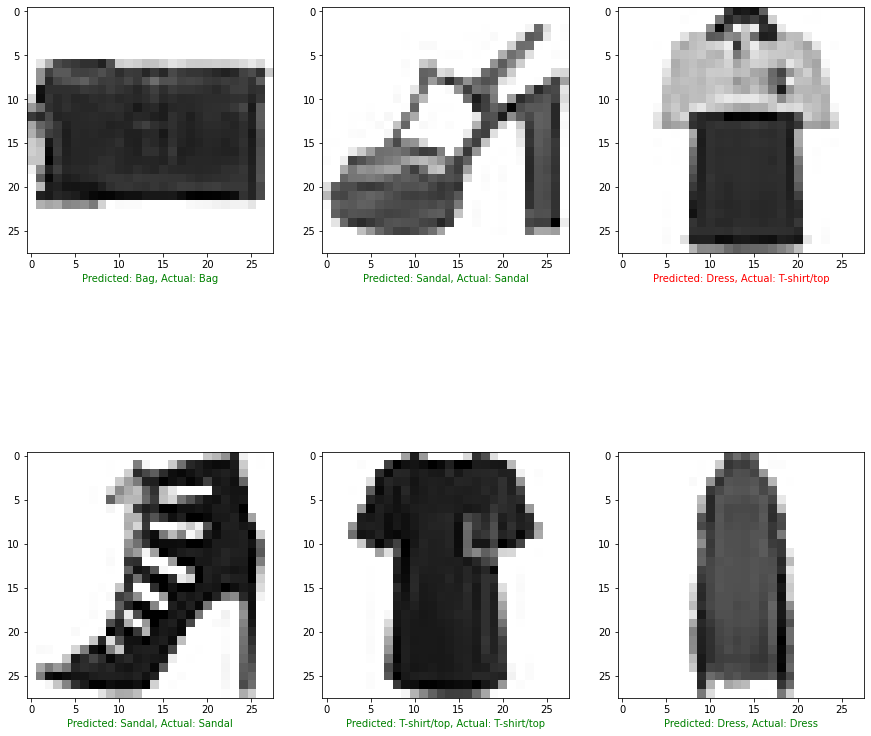

In [61]:
# Check random images and prediction
plot_multiple_random_preds(model=model_4, images=test_data_norm, true_labels=test_label, classes=class_names)

## What patterns are our model learning

In [63]:
# Check the layers of last model
model_4.layers


In [65]:
# Extracting a particular layer
model_4.layers[0]

In [70]:
# Get the patterns of a layer
weights, biases = model_4.layers[1].get_weights()

# Check the values and shape of weights
weights, weights.shape

(array([[-0.41568333,  0.8797607 , -0.77914935,  0.04163137],
        [-0.6733711 ,  1.4912477 ,  0.06178872, -0.21465848],
        [ 0.71542835, -0.2587731 , -1.3024038 , -0.5073505 ],
        ...,
        [-0.78605264,  0.58368194, -0.15824306,  0.23683397],
        [-0.53820276,  0.73391545, -0.1619309 , -0.35920298],
        [-0.07231373,  1.3045212 , -0.25310114,  0.30887684]],
       dtype=float32), (784, 4))

In [72]:
# Now let's check the bias vector
biases, biases.shape

(array([1.4785889 , 1.0795792 , 1.3908318 , 0.71767086], dtype=float32), (4,))